# Project - COVID-19 Analysis [EDA & Visualization]

- You can find the full project at: https://ourworldindata.org/coronavirus
- Daily-updated dataset link: https://covid.ourworldindata.org/data/owid-covid-data.csv
- We'll be exploring the dataset from: https://covid.ourworldindata.org
- Dashboard Example: https://coronavirus.jhu.edu/map.html

## DATA UNDERSTANDING

### Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86891,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86892,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86893,ZWE,Africa,Zimbabwe,2021-05-06,38398.0,41.0,23.286,1575.0,1.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86894,ZWE,Africa,Zimbabwe,2021-05-07,38403.0,5.0,20.857,1576.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
86891,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86892,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86893,ZWE,Africa,Zimbabwe,2021-05-06,38398.0,41.0,23.286,1575.0,1.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86894,ZWE,Africa,Zimbabwe,2021-05-07,38403.0,5.0,20.857,1576.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86895,ZWE,Africa,Zimbabwe,2021-05-08,38414.0,11.0,22.000,1576.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
df.shape

(86896, 59)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86896 entries, 0 to 86895
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               86896 non-null  object 
 1   continent                              82713 non-null  object 
 2   location                               86896 non-null  object 
 3   date                                   86896 non-null  object 
 4   total_cases                            84664 non-null  float64
 5   new_cases                              84662 non-null  float64
 6   new_cases_smoothed                     83661 non-null  float64
 7   total_deaths                           74936 non-null  float64
 8   new_deaths                             75094 non-null  float64
 9   new_deaths_smoothed                    83661 non-null  float64
 10  total_cases_per_million                84207 non-null  float64
 11  ne

In [9]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.466400e+04,84662.000000,83661.000000,7.493600e+04,75094.000000,83661.000000,84207.000000,84205.000000,83209.000000,74492.000000,...,78579.000000,53480.000000,79159.000000,80351.000000,62003.000000,61090.000000,39767.000000,72214.000000,82464.000000,79036.000000
mean,8.563349e+05,5929.960136,5909.639958,2.364604e+04,140.506365,124.584843,10465.895801,74.906470,75.011972,232.313072,...,19148.620788,13.352203,257.869544,7.822528,10.524779,32.660250,50.903886,3.029610,73.168189,0.727104
std,5.914187e+06,37293.716340,36606.072173,1.400248e+05,767.594790,703.146103,19963.370294,176.508546,149.460021,407.006389,...,19837.972036,19.943649,118.790358,3.981427,10.404151,13.474315,31.762556,2.462803,7.549430,0.150072
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,9.700000e+02,2.000000,7.000000,4.600000e+01,0.000000,0.000000,207.876500,0.196000,1.182000,6.862750,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,1.082300e+04,71.000000,87.000000,3.230000e+02,2.000000,1.286000,1426.159000,7.759000,10.244000,41.124000,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,1.153232e+05,776.000000,808.571000,3.139250e+03,18.000000,13.857000,10286.724500,69.000000,77.032000,250.009250,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.730000,0.848000
max,1.576882e+08,905992.000000,826374.286000,3.283031e+06,17906.000000,14435.714000,173506.762000,8652.658000,2648.773000,2950.618000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


==========

## EXPLORING WORLD DATA

### Listinf all countries / regions in our data

In [10]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fij

In [11]:
df['location'].nunique()

219

### Selecting the 'World' data

In [12]:
df_world = df[df.location == 'World']
df_world

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
85197,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85198,OWID_WRL,NaN,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85199,OWID_WRL,NaN,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85200,OWID_WRL,NaN,World,2020-01-25,1433.0,492.0,NaN,42.0,16.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85201,OWID_WRL,NaN,World,2020-01-26,2118.0,685.0,NaN,56.0,14.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85665,OWID_WRL,NaN,World,2021-05-04,154359533.0,807436.0,806094.429,3227598.0,13960.0,13215.429,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85666,OWID_WRL,NaN,World,2021-05-05,155200532.0,840999.0,796809.714,3241798.0,14200.0,12998.429,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85667,OWID_WRL,NaN,World,2021-05-06,156070356.0,869824.0,792841.429,3256037.0,14239.0,12891.143,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85668,OWID_WRL,NaN,World,2021-05-07,156901680.0,831324.0,786028.571,3269856.0,13819.0,12827.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


### Finding the date of the maximum number of deaths all over the world

In [13]:
df_world[df_world['new_deaths'] == df_world['new_deaths'].max()]['date']

85561    2021-01-20
Name: date, dtype: object

### Creating a summary table for the most recent date all over the world

In [14]:
df_world_recent = df_world[df_world['date'] == df_world.date.max()]
df_world_recent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
85669,OWID_WRL,NaN,World,2021-05-08,157688226.0,786546.0,784581.0,3283031.0,13175.0,12915.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [15]:
 df_world_recent.groupby("date")[["total_cases","new_cases","new_deaths","total_deaths"]].sum()

,total_cases,new_cases,new_deaths,total_deaths
date,,,,
2021-05-08,157688226.0,786546.0,13175.0,3283031.0


### Calculating the percentage of confirmed cases regarding the world population

In [16]:
df_world['population'].unique()

array([7.79479873e+09])

In [17]:
df_world['total_cases'].max()

157688226.0

In [18]:
df_world_ratio = df_world['total_cases'].max() / df_world['population'].max()
df_world_ratio

0.020229929146641342

==========

## VISUALLIZING WORLD DATA

### Confirmed cases (Total Cases) all over the world

In [19]:
df_world_over_time = df_world.groupby(["date"])[["total_cases","new_cases","total_deaths","new_deaths"]].sum().reset_index().sort_values("date",ascending=True).reset_index(drop=True)
df_world_over_time

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-22,557.0,0.0,17.0,0.0
1,2020-01-23,655.0,98.0,18.0,1.0
2,2020-01-24,941.0,286.0,26.0,8.0
3,2020-01-25,1433.0,492.0,42.0,16.0
4,2020-01-26,2118.0,685.0,56.0,14.0
...,...,...,...,...,...
468,2021-05-04,154359533.0,807436.0,3227598.0,13960.0
469,2021-05-05,155200532.0,840999.0,3241798.0,14200.0
470,2021-05-06,156070356.0,869824.0,3256037.0,14239.0
471,2021-05-07,156901680.0,831324.0,3269856.0,13819.0


Text(0, 0.5, 'Confirmed cases')

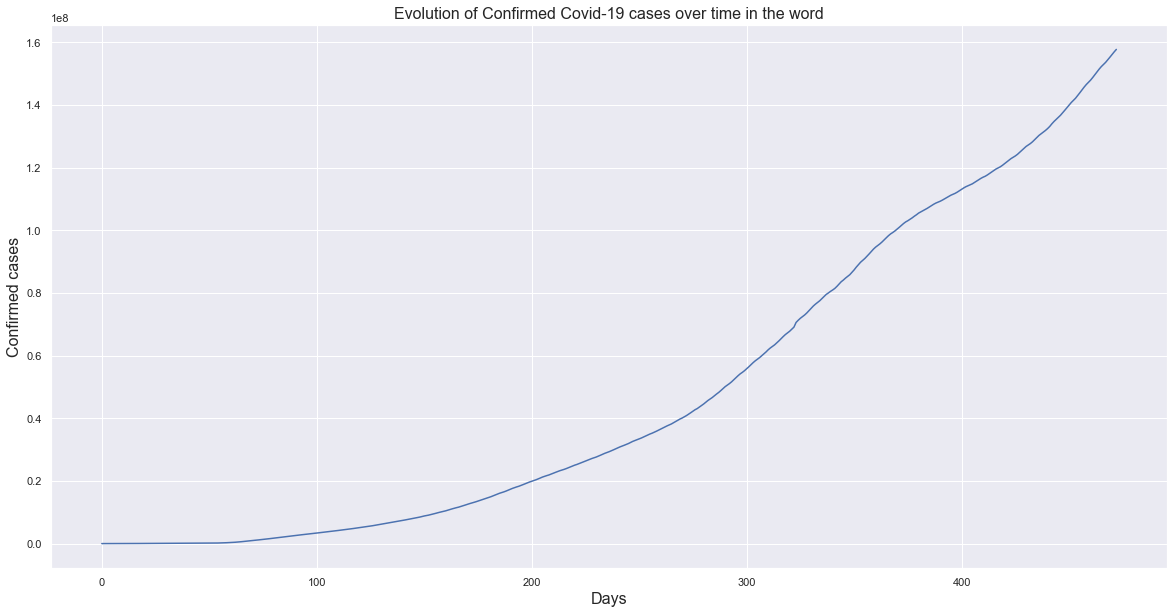

In [20]:
# Using line-plot
plt.figure(figsize=(20,10))
plt.plot(df_world_over_time.index, df_world_over_time['total_cases'])
plt.title('Evolution of Confirmed Covid-19 cases over time in the word', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Confirmed cases', fontsize=16)

### Total deaths cases evolution over time

Text(0, 0.5, 'Number of Deaths')

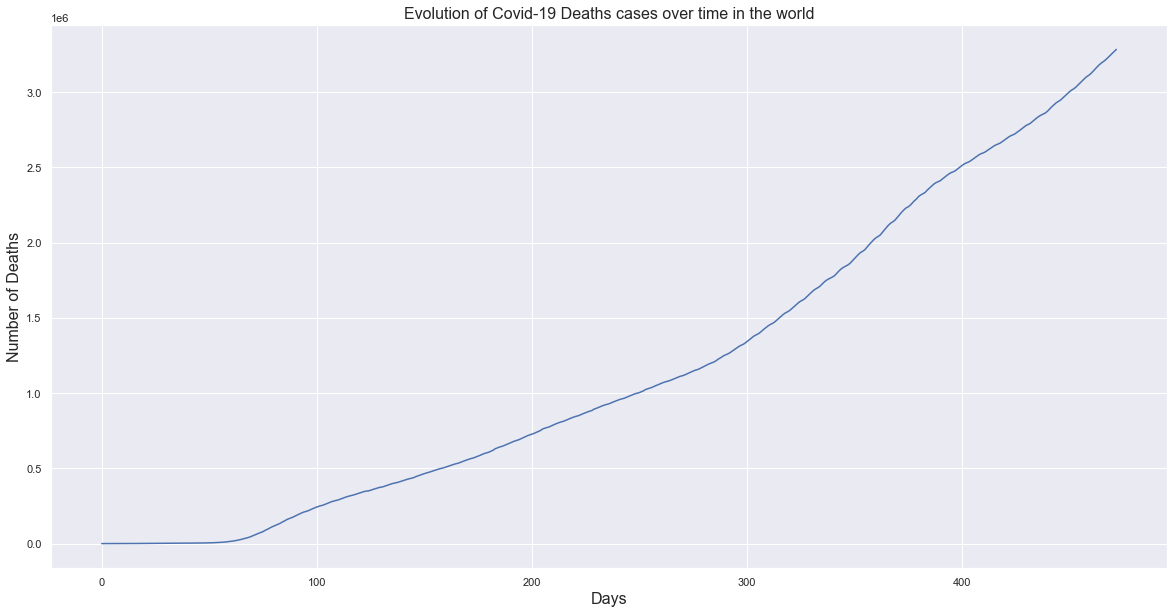

In [21]:
# Using line-plot
plt.figure(figsize=(20,10))
plt.plot(df_world_over_time.index, df_world_over_time['total_deaths'])
plt.title('Evolution of Covid-19 Deaths cases over time in the world', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Number of Deaths', fontsize=16)

### New cases all over the world

Text(0, 0.5, 'New Cases')

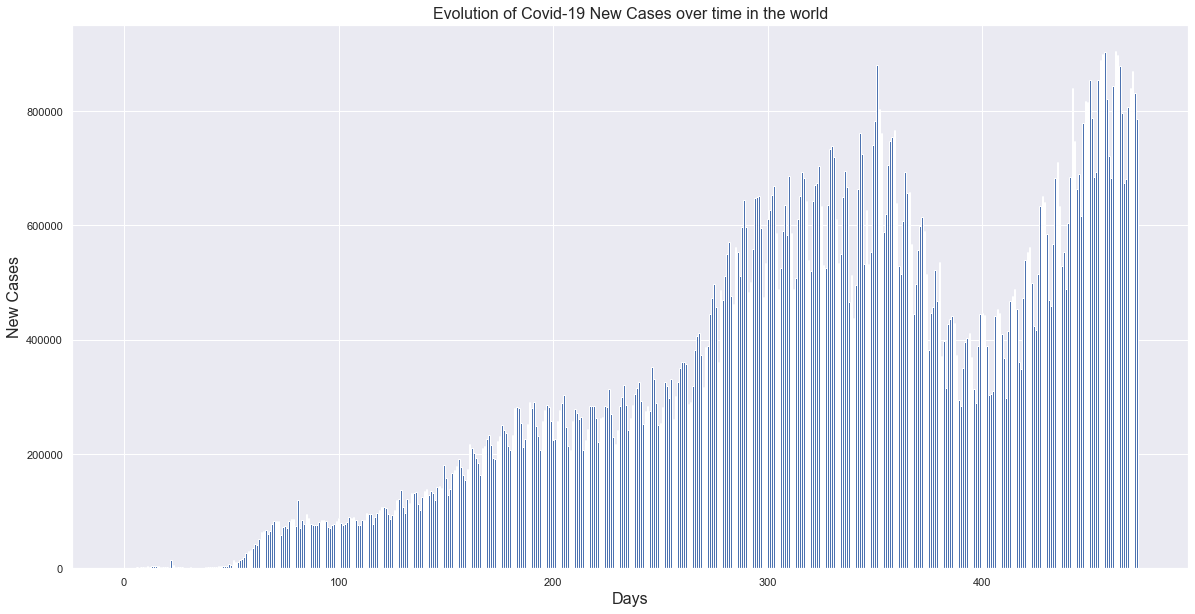

In [22]:
# Using line-plot
plt.figure(figsize=(20,10))
plt.bar(df_world_over_time.index, df_world_over_time['new_cases'])
plt.title('Evolution of Covid-19 New Cases over time in the world', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('New Cases', fontsize=16)

### Putting it all together

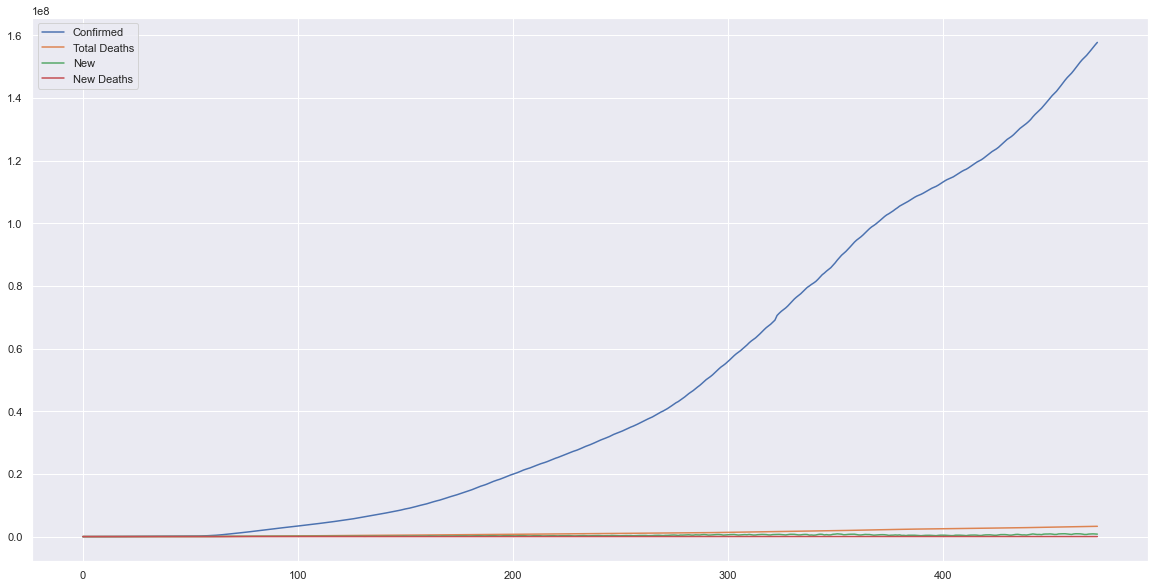

In [23]:
# Using line-plot
plt.figure(figsize=(20,10))
plt.plot(df_world_over_time.index, df_world_over_time['total_cases'], label='Confirmed')
plt.plot(df_world_over_time.index, df_world_over_time['total_deaths'], label='Total Deaths')
plt.plot(df_world_over_time.index, df_world_over_time['new_cases'], label='New')
plt.plot(df_world_over_time.index, df_world_over_time['new_deaths'], label='New Deaths')
plt.legend(loc=0)
plt.show()

==========

## EXPLORING EGYPT DATA

### Let's first get 'Egypt' data

In [24]:
df_egypt = df[df['location'] == 'Egypt']
df_egypt

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
23347,EGY,Africa,Egypt,2020-02-14,1.0,1.0,NaN,NaN,NaN,NaN,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
23348,EGY,Africa,Egypt,2020-02-15,1.0,0.0,NaN,NaN,NaN,NaN,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
23349,EGY,Africa,Egypt,2020-02-16,1.0,0.0,NaN,NaN,NaN,NaN,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
23350,EGY,Africa,Egypt,2020-02-17,1.0,0.0,NaN,NaN,NaN,NaN,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
23351,EGY,Africa,Egypt,2020-02-18,1.0,0.0,NaN,NaN,NaN,NaN,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23792,EGY,Africa,Egypt,2021-05-04,231803.0,1090.0,1040.857,13591.0,60.0,60.429,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
23793,EGY,Africa,Egypt,2021-05-05,232905.0,1102.0,1053.857,13655.0,64.0,62.286,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
23794,EGY,Africa,Egypt,2021-05-06,234015.0,1110.0,1069.143,13714.0,59.0,62.286,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
23795,EGY,Africa,Egypt,2021-05-07,235140.0,1125.0,1084.000,13779.0,65.0,62.857,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707


### Creating a summary table for the most recent 'Egypt' data

In [25]:
df_egypt[['total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]]

,total_cases,new_cases,total_deaths,new_deaths
23347,1.0,1.0,NaN,NaN
23348,1.0,0.0,NaN,NaN
23349,1.0,0.0,NaN,NaN
23350,1.0,0.0,NaN,NaN
23351,1.0,0.0,NaN,NaN
...,...,...,...,...
23792,231803.0,1090.0,13591.0,60.0
23793,232905.0,1102.0,13655.0,64.0
23794,234015.0,1110.0,13714.0,59.0
23795,235140.0,1125.0,13779.0,65.0


In [26]:
df_egypt_recent = df_egypt[df_egypt['date'] == df_egypt.date.max()]
df_egypt_recent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
23796,EGY,Africa,Egypt,2021-05-08,236272.0,1132.0,1098.286,13845.0,66.0,63.286,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707


In [27]:
df_egypt_recent[['date','total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]]

,date,total_cases,new_cases,total_deaths,new_deaths
23796,2021-05-08,236272.0,1132.0,13845.0,66.0


### Calculating the maximum values of 'Egypt' data

In [28]:
df_egypt[['total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]].max()

total_cases     236272.0
new_cases         1774.0
total_deaths     13845.0
new_deaths          97.0
dtype: float64

### The highest date recorded for death in Egypt

In [29]:
df_egypt[df_egypt['new_deaths'] == df_egypt['new_deaths'].max()]['date']

23469    2020-06-15
Name: date, dtype: object

### The average value(s) of daily-recorded data in Egypt

In [30]:
df_egypt['new_cases'].mean()

525.0488888888889

### New cases of January 2021 in Egypt

In [31]:
df_egypt_mod = df_egypt[['date', 'new_cases']]
df_egypt_mod

,date,new_cases
23347,2020-02-14,1.0
23348,2020-02-15,0.0
23349,2020-02-16,0.0
23350,2020-02-17,0.0
23351,2020-02-18,0.0
...,...,...
23792,2021-05-04,1090.0
23793,2021-05-05,1102.0
23794,2021-05-06,1110.0
23795,2021-05-07,1125.0


In [32]:
df_egypt_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 23347 to 23796
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       450 non-null    object 
 1   new_cases  450 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [33]:
pd.to_datetime(df_egypt_mod['date'])

23347   2020-02-14
23348   2020-02-15
23349   2020-02-16
23350   2020-02-17
23351   2020-02-18
           ...    
23792   2021-05-04
23793   2021-05-05
23794   2021-05-06
23795   2021-05-07
23796   2021-05-08
Name: date, Length: 450, dtype: datetime64[ns]

In [34]:
df_egypt_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 23347 to 23796
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       450 non-null    object 
 1   new_cases  450 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [35]:
df_egypt_mod.set_index('date')

,new_cases
date,
2020-02-14,1.0
2020-02-15,0.0
2020-02-16,0.0
2020-02-17,0.0
2020-02-18,0.0
...,...
2021-05-04,1090.0
2021-05-05,1102.0
2021-05-06,1110.0


In [36]:
# New cases in January 2021 in Egypt
df_jan_egypt = df_egypt_mod[(df_egypt_mod.date >= '2021-01-01') & (df_egypt_mod.date <= '2021-01-31')].reset_index(drop=True)
df_jan_egypt

,date,new_cases
0,2021-01-01,1409.0
1,2021-01-02,1407.0
2,2021-01-03,1309.0
3,2021-01-04,1277.0
4,2021-01-05,1119.0
5,2021-01-06,1007.0
6,2021-01-07,1219.0
7,2021-01-08,1001.0
8,2021-01-09,989.0
9,2021-01-10,993.0


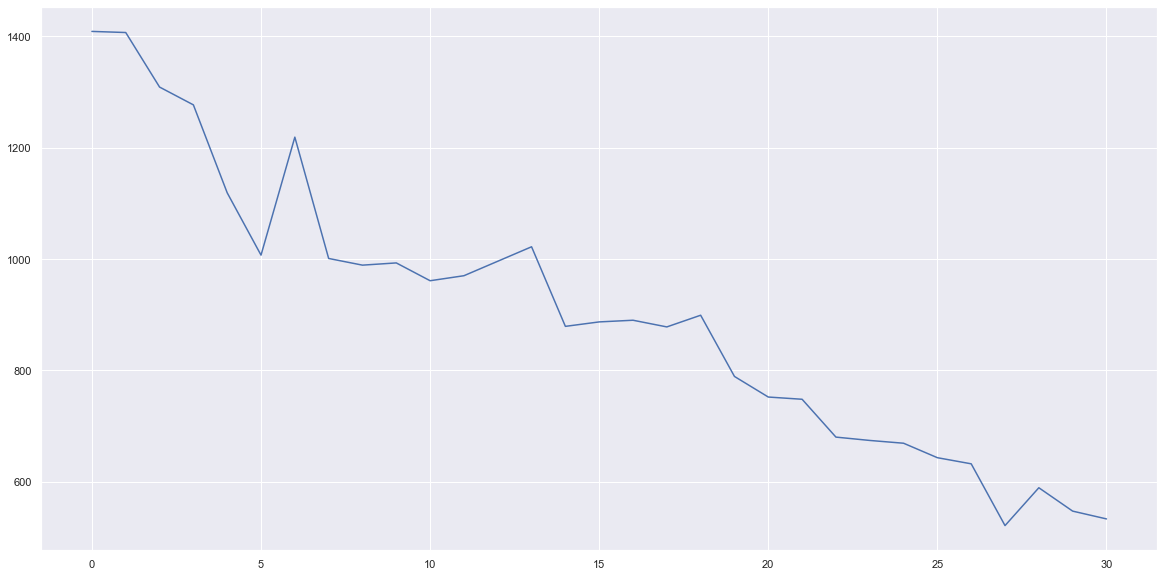

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df_jan_egypt.index, df_jan_egypt['new_cases'])

In [38]:
df_jan_egypt[df_jan_egypt['date'] == '2021-01-03']

,date,new_cases
2,2021-01-03,1309.0


==========

# THANK YOU!